# Melbourne House Price Prediction Data

*About the data*

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:

S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

In [99]:
housing = pd.read_csv("C:\\Users\\GA336773\\Desktop\\Python Data Science\Datasets\\Melbourne_housing_FULL.csv")

In [100]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [101]:
housing.shape

(34857, 21)

In [102]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [103]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

# Data Cleaning

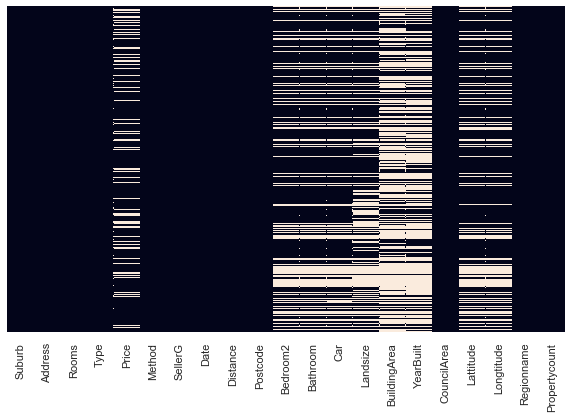

In [104]:
plt.figure(figsize = (10,6))
sns.heatmap(housing.isnull(),yticklabels = False, cbar = False)

In [105]:
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [106]:
housing.drop(columns = ['BuildingArea', 'YearBuilt'], inplace = True)

In [107]:
housing.drop(columns = ['Address'], inplace = True)

In [108]:
housing.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [109]:
housing[housing['CouncilArea'].isnull()]

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29483,Fawkner Lot,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
housing = housing.dropna(how = 'any',subset = ['CouncilArea'])

In [111]:
housing.shape

(34854, 18)

In [112]:
housing.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          8214
Bathroom          8223
Car               8725
Landsize         11807
CouncilArea          0
Lattitude         7973
Longtitude        7973
Regionname           0
Propertycount        0
dtype: int64

In [113]:
housing.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.465231,0.271481,0.085867,0.946755,0.611826,0.393878,0.037402,0.004872,0.103235,-0.071677
Price,0.465231,1.000000,-0.211415,0.044934,0.430275,0.429878,0.201803,0.032748,-0.215607,0.197874,-0.059017
Distance,0.271481,-0.211415,1.000000,0.481556,0.269524,0.126201,0.241835,0.060862,-0.100417,0.200946,-0.018140
Postcode,0.085867,0.044934,0.481556,1.000000,0.089292,0.120080,0.067886,0.040664,-0.231027,0.362895,0.017108
Bedroom2,0.946755,0.430275,0.269524,0.089292,1.000000,0.614892,0.388491,0.037019,0.003447,0.106164,-0.053451
Bathroom,0.611826,0.429878,0.126201,0.120080,0.614892,1.000000,0.307518,0.036333,-0.059183,0.106531,-0.032887
Car,0.393878,0.201803,0.241835,0.067886,0.388491,0.307518,1.000000,0.037829,-0.009020,0.047213,-0.009617
Landsize,0.037402,0.032748,0.060862,0.040664,0.037019,0.036333,0.037829,1.000000,0.025318,-0.002582,-0.018195
Lattitude,0.004872,-0.215607,-0.100417,-0.231027,0.003447,-0.059183,-0.009020,0.025318,1.000000,-0.345589,0.011112
Longtitude,0.103235,0.197874,0.200946,0.362895,0.106164,0.106531,0.047213,-0.002582,-0.345589,1.000000,0.016326


In [114]:
#Dropping Bedroom2 column since the correlation between Bedroom2 and Rooms columns is more than 90%
housing.drop(columns = ['Bedroom2'], inplace = True)

In [115]:
housing['Bathroom'].value_counts()

1.0     12969
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
9.0         1
12.0        1
Name: Bathroom, dtype: int64

In [116]:
housing['Car'].value_counts()

2.0     12214
1.0      9164
0.0      1631
3.0      1606
4.0      1161
5.0       151
6.0       140
7.0        25
8.0        23
10.0        6
9.0         3
11.0        2
26.0        1
12.0        1
18.0        1
Name: Car, dtype: int64

In [117]:
housing['Bathroom'].mean()

1.624798167549097

In [118]:
housing['Bathroom'].value_counts(normalize = True)

1.0     0.486989
2.0     0.415456
3.0     0.081897
4.0     0.010101
5.0     0.002891
0.0     0.001727
6.0     0.000601
7.0     0.000150
8.0     0.000113
9.0     0.000038
12.0    0.000038
Name: Bathroom, dtype: float64

In [119]:
housing['Bathroom'] = housing['Bathroom'].fillna(1.0)

In [120]:
housing.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bathroom             0
Car               8725
Landsize         11807
CouncilArea          0
Lattitude         7973
Longtitude        7973
Regionname           0
Propertycount        0
dtype: int64

In [121]:
housing['Car'].value_counts(normalize = True)

2.0     0.467450
1.0     0.350721
0.0     0.062421
3.0     0.061464
4.0     0.044433
5.0     0.005779
6.0     0.005358
7.0     0.000957
8.0     0.000880
10.0    0.000230
9.0     0.000115
11.0    0.000077
26.0    0.000038
12.0    0.000038
18.0    0.000038
Name: Car, dtype: float64

In [122]:
housing['Car'] = housing['Car'].fillna(2.0)

In [123]:
housing['Landsize'].nunique()

1684

In [124]:
housing['Landsize'].mean()

593.598993361392

In [125]:
housing['Landsize'] = housing['Landsize'].fillna(housing['Landsize'].mean())

In [126]:
housing['Lattitude'] = housing['Lattitude'].fillna(housing['Lattitude'].mean())

In [127]:
housing['Longtitude'] = housing['Longtitude'].fillna(housing['Longtitude'].mean())

In [128]:
housing.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                 0
Landsize            0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [129]:
housing['SellerG'].value_counts()

Jellis           3358
Nelson           3236
Barry            3235
hockingstuart    2623
Marshall         2027
                 ... 
Meallin             1
Direct              1
Conquest            1
Hill                1
Zahn                1
Name: SellerG, Length: 388, dtype: int64

In [130]:
housing.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [131]:
categorical_columns = ['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']

In [132]:
housing['Month'] = housing['Date'].apply(lambda x : x.split('/')[1])

In [133]:
housing['Year'] = housing['Date'].apply(lambda x : x.split('/')[2])

In [134]:
housing.drop(columns = ['Date'], inplace = True)

In [135]:
housing

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,3067.0,1.0,1.0,126.000000,Yarra City Council,-37.801400,144.995800,Northern Metropolitan,4019.0,09,2016
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,3067.0,1.0,1.0,202.000000,Yarra City Council,-37.799600,144.998400,Northern Metropolitan,4019.0,12,2016
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,1.0,0.0,156.000000,Yarra City Council,-37.807900,144.993400,Northern Metropolitan,4019.0,02,2016
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3067.0,2.0,1.0,0.000000,Yarra City Council,-37.811400,145.011600,Northern Metropolitan,4019.0,02,2016
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,2.0,0.0,134.000000,Yarra City Council,-37.809300,144.994400,Northern Metropolitan,4019.0,03,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.0,PI,Jas,6.3,3013.0,1.0,3.0,593.000000,Maribyrnong City Council,-37.810530,144.884670,Western Metropolitan,6543.0,02,2018
34853,Yarraville,2,h,888000.0,SP,Sweeney,6.3,3013.0,2.0,1.0,98.000000,Maribyrnong City Council,-37.815510,144.888260,Western Metropolitan,6543.0,02,2018
34854,Yarraville,2,t,705000.0,S,Jas,6.3,3013.0,1.0,2.0,220.000000,Maribyrnong City Council,-37.822860,144.878560,Western Metropolitan,6543.0,02,2018
34855,Yarraville,3,h,1140000.0,SP,hockingstuart,6.3,3013.0,1.0,2.0,593.598993,Maribyrnong City Council,-37.810634,145.001851,Western Metropolitan,6543.0,02,2018


# Data Visualization

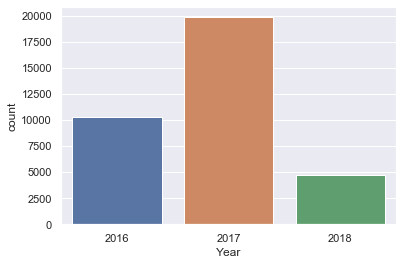

In [136]:
sns.countplot(x = 'Year', data = housing)

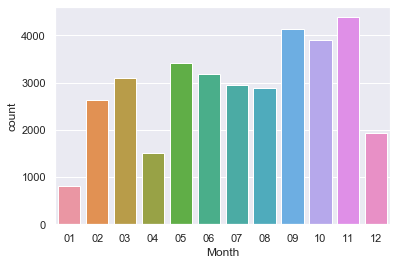

In [137]:
sns.countplot(x = 'Month', data = housing)

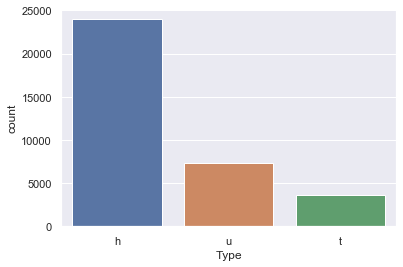

In [138]:
sns.countplot(x = 'Type', data = housing)

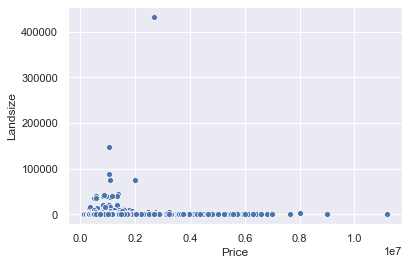

In [139]:
sns.scatterplot(x = 'Price', y = 'Landsize', data = housing)

In [140]:
h1 = housing['Price'].dropna()

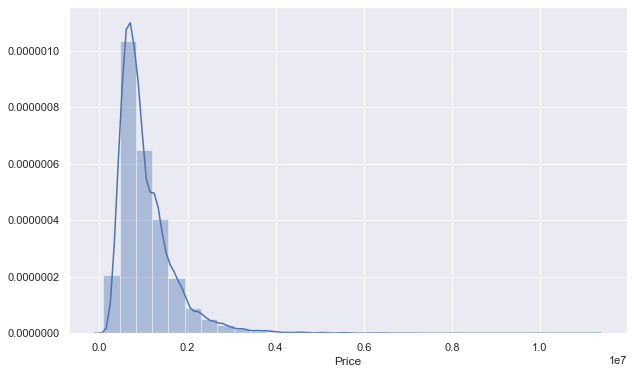

In [141]:
plt.figure(figsize = (10,6))
sns.distplot(h1, bins = 30)

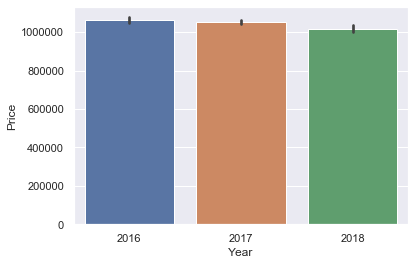

In [142]:
sns.barplot(x = 'Year', y = 'Price', data = housing)

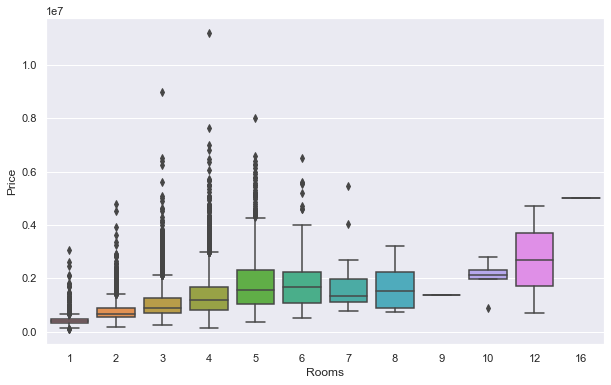

In [143]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Rooms', y = 'Price', data = housing)

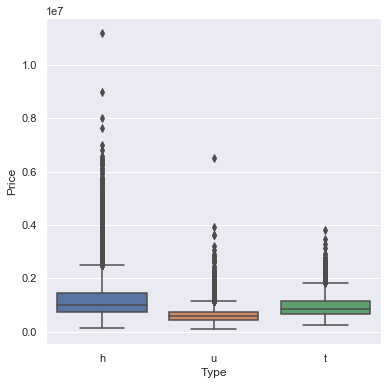

In [144]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'Type', y = 'Price', data = housing)

# Feature Engneering

In [145]:
housing

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,3067.0,1.0,1.0,126.000000,Yarra City Council,-37.801400,144.995800,Northern Metropolitan,4019.0,09,2016
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,3067.0,1.0,1.0,202.000000,Yarra City Council,-37.799600,144.998400,Northern Metropolitan,4019.0,12,2016
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,1.0,0.0,156.000000,Yarra City Council,-37.807900,144.993400,Northern Metropolitan,4019.0,02,2016
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3067.0,2.0,1.0,0.000000,Yarra City Council,-37.811400,145.011600,Northern Metropolitan,4019.0,02,2016
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,2.0,0.0,134.000000,Yarra City Council,-37.809300,144.994400,Northern Metropolitan,4019.0,03,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.0,PI,Jas,6.3,3013.0,1.0,3.0,593.000000,Maribyrnong City Council,-37.810530,144.884670,Western Metropolitan,6543.0,02,2018
34853,Yarraville,2,h,888000.0,SP,Sweeney,6.3,3013.0,2.0,1.0,98.000000,Maribyrnong City Council,-37.815510,144.888260,Western Metropolitan,6543.0,02,2018
34854,Yarraville,2,t,705000.0,S,Jas,6.3,3013.0,1.0,2.0,220.000000,Maribyrnong City Council,-37.822860,144.878560,Western Metropolitan,6543.0,02,2018
34855,Yarraville,3,h,1140000.0,SP,hockingstuart,6.3,3013.0,1.0,2.0,593.598993,Maribyrnong City Council,-37.810634,145.001851,Western Metropolitan,6543.0,02,2018


In [146]:
housing[['Suburb', 'Postcode']].head(10)

,Suburb,Postcode
0,Abbotsford,3067.0
1,Abbotsford,3067.0
2,Abbotsford,3067.0
3,Abbotsford,3067.0
4,Abbotsford,3067.0
5,Abbotsford,3067.0
6,Abbotsford,3067.0
7,Abbotsford,3067.0
8,Abbotsford,3067.0
9,Abbotsford,3067.0


In [147]:
housing.drop(columns = ['Suburb'], inplace = True)

In [148]:
dummies = pd.get_dummies(housing[['Type', 'Method', 'Regionname', 'CouncilArea']], drop_first = True)

housing = pd.concat([housing.drop(['Type', 'Method', 'Regionname', 'CouncilArea'], axis = 1), dummies], axis = 1)

In [149]:
housing

,Rooms,Price,SellerG,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,2,NaN,Jellis,2.5,3067.0,1.0,1.0,126.000000,-37.801400,144.995800,...,0,0,0,0,0,0,0,0,1,0
1,2,1480000.0,Biggin,2.5,3067.0,1.0,1.0,202.000000,-37.799600,144.998400,...,0,0,0,0,0,0,0,0,1,0
2,2,1035000.0,Biggin,2.5,3067.0,1.0,0.0,156.000000,-37.807900,144.993400,...,0,0,0,0,0,0,0,0,1,0
3,3,NaN,Rounds,2.5,3067.0,2.0,1.0,0.000000,-37.811400,145.011600,...,0,0,0,0,0,0,0,0,1,0
4,3,1465000.0,Biggin,2.5,3067.0,2.0,0.0,134.000000,-37.809300,144.994400,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,Jas,6.3,3013.0,1.0,3.0,593.000000,-37.810530,144.884670,...,0,0,0,0,0,0,0,0,0,0
34853,2,888000.0,Sweeney,6.3,3013.0,2.0,1.0,98.000000,-37.815510,144.888260,...,0,0,0,0,0,0,0,0,0,0
34854,2,705000.0,Jas,6.3,3013.0,1.0,2.0,220.000000,-37.822860,144.878560,...,0,0,0,0,0,0,0,0,0,0
34855,3,1140000.0,hockingstuart,6.3,3013.0,1.0,2.0,593.598993,-37.810634,145.001851,...,0,0,0,0,0,0,0,0,0,0


In [150]:
housing['SellerG'].value_counts()[:51]

Jellis           3358
Nelson           3236
Barry            3235
hockingstuart    2623
Marshall         2027
Ray              1950
Buxton           1868
Biggin            897
Fletchers         861
Woodards          714
Brad              700
McGrath           602
Noel              524
Greg              519
RT                516
Miles             478
YPA               473
Jas               456
Harcourts         447
Stockdale         420
Gary              413
Hodges            413
Sweeney           411
Kay               360
Raine             326
HAR               309
RW                273
Love              269
O'Brien           225
Village           217
Williams          203
Philip            172
Douglas           167
Chisholm          166
Purplebricks      160
C21               159
Collins           124
Rendina           124
Eview             123
Buckingham        118
Darren            117
Morrison          113
Thomson           104
Nick              104
LJ                104
Cayzer    

In [151]:
housing = housing.groupby('SellerG').filter(lambda x : len(x) >= 78)

In [152]:
housing

,Rooms,Price,SellerG,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,2,NaN,Jellis,2.5,3067.0,1.0,1.0,126.000000,-37.801400,144.995800,...,0,0,0,0,0,0,0,0,1,0
1,2,1480000.0,Biggin,2.5,3067.0,1.0,1.0,202.000000,-37.799600,144.998400,...,0,0,0,0,0,0,0,0,1,0
2,2,1035000.0,Biggin,2.5,3067.0,1.0,0.0,156.000000,-37.807900,144.993400,...,0,0,0,0,0,0,0,0,1,0
4,3,1465000.0,Biggin,2.5,3067.0,2.0,0.0,134.000000,-37.809300,144.994400,...,0,0,0,0,0,0,0,0,1,0
5,3,850000.0,Biggin,2.5,3067.0,2.0,1.0,94.000000,-37.796900,144.996900,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,Jas,6.3,3013.0,1.0,3.0,593.000000,-37.810530,144.884670,...,0,0,0,0,0,0,0,0,0,0
34853,2,888000.0,Sweeney,6.3,3013.0,2.0,1.0,98.000000,-37.815510,144.888260,...,0,0,0,0,0,0,0,0,0,0
34854,2,705000.0,Jas,6.3,3013.0,1.0,2.0,220.000000,-37.822860,144.878560,...,0,0,0,0,0,0,0,0,0,0
34855,3,1140000.0,hockingstuart,6.3,3013.0,1.0,2.0,593.598993,-37.810634,145.001851,...,0,0,0,0,0,0,0,0,0,0


In [153]:
dummies1 = pd.get_dummies(housing['SellerG'], drop_first = True)

housing = pd.concat([housing.drop(['SellerG'], axis = 1), dummies1], axis = 1)

In [154]:
housing.shape

(31700, 111)

In [155]:
housing

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,...,Ray,Rendina,Stockdale,Sweeney,Thomson,Village,Williams,Woodards,YPA,hockingstuart
0,2,NaN,2.5,3067.0,1.0,1.0,126.000000,-37.801400,144.995800,4019.0,...,0,0,0,0,0,0,0,0,0,0
1,2,1480000.0,2.5,3067.0,1.0,1.0,202.000000,-37.799600,144.998400,4019.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1035000.0,2.5,3067.0,1.0,0.0,156.000000,-37.807900,144.993400,4019.0,...,0,0,0,0,0,0,0,0,0,0
4,3,1465000.0,2.5,3067.0,2.0,0.0,134.000000,-37.809300,144.994400,4019.0,...,0,0,0,0,0,0,0,0,0,0
5,3,850000.0,2.5,3067.0,2.0,1.0,94.000000,-37.796900,144.996900,4019.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,3013.0,1.0,3.0,593.000000,-37.810530,144.884670,6543.0,...,0,0,0,0,0,0,0,0,0,0
34853,2,888000.0,6.3,3013.0,2.0,1.0,98.000000,-37.815510,144.888260,6543.0,...,0,0,0,1,0,0,0,0,0,0
34854,2,705000.0,6.3,3013.0,1.0,2.0,220.000000,-37.822860,144.878560,6543.0,...,0,0,0,0,0,0,0,0,0,0
34855,3,1140000.0,6.3,3013.0,1.0,2.0,593.598993,-37.810634,145.001851,6543.0,...,0,0,0,0,0,0,0,0,0,1


In [156]:
housing.isnull().sum()

Rooms               0
Price            6985
Distance            0
Postcode            0
Bathroom            0
                 ... 
Village             0
Williams            0
Woodards            0
YPA                 0
hockingstuart       0
Length: 111, dtype: int64

In [157]:
housing1 = housing.dropna(how = 'any',subset = ['Price'])

In [158]:
housing2 = housing[housing['Price'].isnull()]

In [159]:
housing1.shape

(24715, 111)

In [160]:
housing2.shape

(6985, 111)

In [186]:
import statsmodels.api as sm
X = housing1.drop('Price',axis=1)
Y = housing1['Price']
X = sm.add_constant(X)
model = sm.OLS(Y, X.astype(float)).fit()
model.summary()

C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     513.8
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:35:31   Log-Likelihood:            -3.5288e+05
No. Observations:               24715   AIC:                         7.059e+05
Df Residuals:                   24628   BIC:                         7.066e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                      -1.249e+08   1.19e+07    -10.509      0.000   -1.48e+08   -1.02e+08
Rooms                                       2.118e+05   3728.758     56.794      0.000    2.04e+05    2.19e+05
Distance                                   -3.429e+04   1030.251    -33.282      0.000   -3.63e+04   -3.23e+04
Postcode                                     193.8531     38.590      5.023      0.000     118.215     269.491
Bathroom                                    1.231e+05   4471.222     27.530      0.000    1.14e+05    1.32e+05
Car                                         4.069e+04   3100.619     13.124      0.000    3.46e+04    4.68e+04
Landsize                                       2.8487      0.791      3.599      0.000       1.297       4.400
Lattitude                                  -4.752e+05   6.17e+04     -7.695      0.000   -5.96e+05   -3.54e+05
Longtitude                                 -1.611e+05    5.1e+04     -3.155      0.002   -2.61e+05    -6.1e+04
Propertycount                                 -1.2144      0.685     -1.773      0.076      -2.557       0.128
Month                                       6477.0996    913.936      7.087      0.000    4685.731    8268.469
Year                                        6.453e+04   4751.528     13.581      0.000    5.52e+04    7.38e+04
Type_t                                     -2.591e+05   8311.352    -31.174      0.000   -2.75e+05   -2.43e+05
Type_u                                     -4.582e+05   7618.371    -60.142      0.000   -4.73e+05   -4.43e+05
Method_PN                                   7.791e-08   7.94e-09      9.807      0.000    6.23e-08    9.35e-08
Method_S                                    7.545e+04   7858.323      9.601      0.000       6e+04    9.08e+04
Method_SA                                   3.487e+04   3.11e+04      1.121      0.262   -2.61e+04    9.58e+04
Method_SP                                   3.878e+04      1e+04      3.861      0.000    1.91e+04    5.85e+04
Method_VB                                   1.148e+04   1.07e+04      1.075      0.282   -9459.864    3.24e+04
Method_W                                   -3.555e-08   3.68e-09     -9.647      0.000   -4.28e-08   -2.83e-08
Regionname_Eastern Victoria                -1.195e+05   6.34e+04     -1.886      0.059   -2.44e+05    4670.194
Regionname_Northern Metropolitan           -1.633e+05   1.64e+04     -9.979      0.000   -1.95e+05   -1.31e+05
Regionname_South-Eastern Metropolitan      -1.098e+05   2.82e+04     -3.892      0.000   -1.65e+05   -5.45e+04
Regionname_Southern Metropolitan           -1.307e+05   1.86e+04     -7.025      0.000   -1.67e+05   -9.42e+04
Regionname_Western Metropolitan            -1.399e+05   2.16e+04     -6.471      0.000

In [176]:
cols = ['Method_SN','Method_SS','Regionname_Northern Victoria','CouncilArea_Hobsons Bay City Council',
        'CouncilArea_Nillumbik Shire Council','CouncilArea_Whittlesea City Council','Barry','Bells','Biggin',
        'Brad','Buckingham','Buxton','Douglas','Eview','Harcourts','Hodges','Rendina','Sweeney','Woodards','YPA','hockingstuart']

In [178]:
housing1.shape

(24715, 90)

In [177]:
housing1.drop(columns = cols, inplace = True)

C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Machine Learning

In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [180]:
X = housing1.drop('Price',axis=1).values
Y = housing1['Price'].values

In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [182]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [183]:
X_train.shape

(19772, 89)

In [184]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
predictions = lr.predict(X_test)

print('MAE:', mean_absolute_error(Y_test, predictions))
print('MSE:', mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, predictions)))

MAE: 252772.28797337384
MSE: 148939155989.55795
RMSE: 385926.360837865


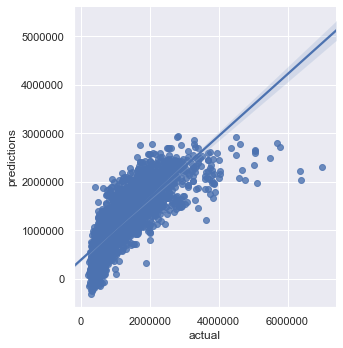

In [185]:
model_pred = pd.DataFrame(predictions, columns = ['predictions'])
pred = pd.DataFrame(Y_test, columns = ['actual'])
pr = pd.concat([model_pred, pred], axis = 1)
sns.lmplot(x = 'actual', y = 'predictions', data = pr)

In [188]:
ls = Lasso()
ls.fit(X_train,Y_train)
predictions = ls.predict(X_test)

print('MAE:', mean_absolute_error(Y_test, predictions))
print('MSE:', mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, predictions)))

MAE: 252794.61456870928
MSE: 148945458530.84042
RMSE: 385934.52622283023


In [190]:
en = ElasticNet()
en.fit(X_train,Y_train)
predictions = en.predict(X_test)

print('MAE:', mean_absolute_error(Y_test, predictions))
print('MSE:', mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, predictions)))

MAE: 262506.56747310923
MSE: 169501358202.72885
RMSE: 411705.4264917197


In [197]:
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
predictions = rfr.predict(X_test)

print('MAE:', mean_absolute_error(Y_test, predictions))
print('MSE:', mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, predictions)))

MAE: 170463.62315260258
MSE: 86796602946.92863
RMSE: 294612.63202199707


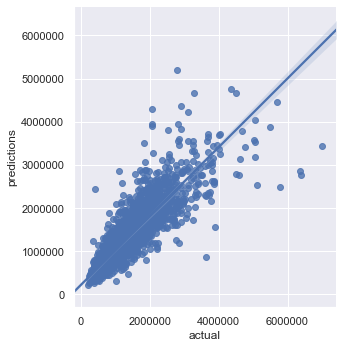

In [198]:
#RandomForest
model_pred = pd.DataFrame(predictions, columns = ['predictions'])
pred = pd.DataFrame(Y_test, columns = ['actual'])
pr = pd.concat([model_pred, pred], axis = 1)
sns.lmplot(x = 'actual', y = 'predictions', data = pr)

In [192]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,Y_train)
predictions = gbr.predict(X_test)

print('MAE:', mean_absolute_error(Y_test, predictions))
print('MSE:', mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, predictions)))

MAE: 197040.99682720882
MSE: 105565043606.4257
RMSE: 324907.7463010473


In [193]:
etr = ExtraTreesRegressor()
etr.fit(X_train,Y_train)
predictions = etr.predict(X_test)

print('MAE:', mean_absolute_error(Y_test, predictions))
print('MSE:', mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, predictions)))

MAE: 177201.41532369005
MSE: 93721368968.74812
RMSE: 306139.459999439


In [194]:
adr = AdaBoostRegressor()
adr.fit(X_train,Y_train)
predictions = adr.predict(X_test)

print('MAE:', mean_absolute_error(Y_test, predictions))
print('MSE:', mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, predictions)))

MAE: 674320.4651075113
MSE: 552033497821.1307
RMSE: 742989.5677740911


In [126]:
housing2

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,...,Ray,Rendina,Stockdale,Sweeney,Thomson,Village,Williams,Woodards,YPA,hockingstuart
0,2,NaN,2.5,3067.0,1.0,1.0,126.000000,-37.801400,144.995800,4019.0,...,0,0,0,0,0,0,0,0,0,0
7,4,NaN,2.5,3067.0,2.0,2.0,400.000000,-37.796500,144.996500,4019.0,...,0,0,0,0,0,0,0,0,0,0
8,2,NaN,2.5,3067.0,1.0,2.0,201.000000,-37.799500,144.997400,4019.0,...,0,0,0,0,0,0,0,0,0,0
9,2,NaN,2.5,3067.0,2.0,1.0,202.000000,-37.799600,144.998900,4019.0,...,0,0,0,0,0,0,0,0,0,0
12,2,NaN,2.5,3067.0,2.0,1.0,4292.000000,-37.807800,144.996500,4019.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34829,3,NaN,3.1,3003.0,1.0,2.0,593.598993,-37.810634,145.001851,2230.0,...,0,0,0,0,0,0,0,0,0,1
34834,4,NaN,16.7,3150.0,2.0,2.0,714.000000,-37.902870,145.190110,7392.0,...,0,0,0,0,0,0,0,0,0,0
34835,3,NaN,16.7,3150.0,2.0,2.0,677.000000,-37.919050,145.191050,7392.0,...,0,0,0,0,0,0,0,0,0,0
34845,4,NaN,4.6,3181.0,3.0,2.0,279.000000,-37.854180,144.996970,4380.0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
H2_predict = housing2.drop(columns = ['Price'])

In [128]:
H2_predict.shape

(6985, 110)

In [132]:
H2_predict_X_test = scaler.transform(H2_predict)

In [133]:
H2_predictions = rfr.predict(H2_predict_X_test)

In [135]:
H2_predictions

array([1007300., 1735605., 1231185., ..., 1095736., 2409890.,  492770.])

In [136]:
housing2['Price'] = rfr.predict(H2_predict_X_test)

C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
housing2

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,...,Ray,Rendina,Stockdale,Sweeney,Thomson,Village,Williams,Woodards,YPA,hockingstuart
0,2,1.007300e+06,2.5,3067.0,1.0,1.0,126.000000,-37.801400,144.995800,4019.0,...,0,0,0,0,0,0,0,0,0,0
7,4,1.735605e+06,2.5,3067.0,2.0,2.0,400.000000,-37.796500,144.996500,4019.0,...,0,0,0,0,0,0,0,0,0,0
8,2,1.231185e+06,2.5,3067.0,1.0,2.0,201.000000,-37.799500,144.997400,4019.0,...,0,0,0,0,0,0,0,0,0,0
9,2,1.260910e+06,2.5,3067.0,2.0,1.0,202.000000,-37.799600,144.998900,4019.0,...,0,0,0,0,0,0,0,0,0,0
12,2,7.509893e+05,2.5,3067.0,2.0,1.0,4292.000000,-37.807800,144.996500,4019.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34829,3,1.237950e+06,3.1,3003.0,1.0,2.0,593.598993,-37.810634,145.001851,2230.0,...,0,0,0,0,0,0,0,0,0,1
34834,4,1.167207e+06,16.7,3150.0,2.0,2.0,714.000000,-37.902870,145.190110,7392.0,...,0,0,0,0,0,0,0,0,0,0
34835,3,1.095736e+06,16.7,3150.0,2.0,2.0,677.000000,-37.919050,145.191050,7392.0,...,0,0,0,0,0,0,0,0,0,0
34845,4,2.409890e+06,4.6,3181.0,3.0,2.0,279.000000,-37.854180,144.996970,4380.0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
housing2['Price'].describe()

count    6.985000e+03
mean     1.316365e+06
std      7.537070e+05
min      2.272100e+05
25%      7.486650e+05
50%      1.132802e+06
75%      1.673660e+06
max      5.368040e+06
Name: Price, dtype: float64

# Artificial Neural Networks

In [139]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [140]:
X_train.shape

(19772, 110)

In [141]:
model = Sequential()

model.add(Dense(units=110,activation='relu'))

model.add(Dense(units=55,activation='relu'))

model.add(Dense(units=1,activation='linear'))

# For a regression problem
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [142]:
model.fit(x=X_train, y=Y_train, epochs=250, validation_data=(X_test, Y_test), verbose=1)

Train on 19772 samples, validate on 4943 samples
Epoch 1/250
19772/19772 [==============================] - 4s 207us/sample - loss: 1058549.3150 - mean_absolute_error: 1058549.3750 - val_loss: 1050018.2999 - val_mean_absolute_error: 1050018.2500
Epoch 2/250
19772/19772 [==============================] - 2s 120us/sample - loss: 972051.4925 - mean_absolute_error: 972052.4375 - val_loss: 879989.1867 - val_mean_absolute_error: 879989.1250
Epoch 3/250
19772/19772 [==============================] - 3s 141us/sample - loss: 715879.0096 - mean_absolute_error: 715879.1250 - val_loss: 576693.9213 - val_mean_absolute_error: 576693.8750
Epoch 4/250
19772/19772 [==============================] - 3s 139us/sample - loss: 458972.5781 - mean_absolute_error: 458972.6875 - val_loss: 382236.6189 - val_mean_absolute_error: 382236.6562
Epoch 5/250
19772/19772 [==============================] - 2s 119us/sample - loss: 325842.4841 - mean_absolute_error: 325842.5625 - val_loss: 300345.4209 - val_mean_absolute_e

19772/19772 [==============================] - 2s 112us/sample - loss: 205574.7124 - mean_absolute_error: 205574.7031 - val_loss: 209425.6857 - val_mean_absolute_error: 209425.7344
Epoch 44/250
19772/19772 [==============================] - 2s 125us/sample - loss: 205315.5861 - mean_absolute_error: 205315.5312 - val_loss: 209066.8493 - val_mean_absolute_error: 209066.8750
Epoch 45/250
19772/19772 [==============================] - 3s 136us/sample - loss: 205080.8820 - mean_absolute_error: 205080.7500 - val_loss: 208972.2310 - val_mean_absolute_error: 208972.2188
Epoch 46/250
19772/19772 [==============================] - 5s 250us/sample - loss: 204843.5153 - mean_absolute_error: 204843.5312 - val_loss: 208682.9587 - val_mean_absolute_error: 208682.9531
Epoch 47/250
19772/19772 [==============================] - 3s 142us/sample - loss: 204608.6423 - mean_absolute_error: 204608.6094 - val_loss: 208447.1601 - val_mean_absolute_error: 208447.1562
Epoch 48/250
19772/19772 [=================

19772/19772 [==============================] - 3s 128us/sample - loss: 195392.8731 - mean_absolute_error: 195392.9375 - val_loss: 201726.6481 - val_mean_absolute_error: 201726.5781
Epoch 128/250
19772/19772 [==============================] - 3s 137us/sample - loss: 195345.3084 - mean_absolute_error: 195345.3906 - val_loss: 201696.9430 - val_mean_absolute_error: 201696.9531
Epoch 129/250
19772/19772 [==============================] - 2s 119us/sample - loss: 195255.5033 - mean_absolute_error: 195255.5469 - val_loss: 201677.9021 - val_mean_absolute_error: 201677.9375
Epoch 130/250
19772/19772 [==============================] - 2s 119us/sample - loss: 195216.8777 - mean_absolute_error: 195216.8750 - val_loss: 201678.0193 - val_mean_absolute_error: 201678.0625
Epoch 131/250
19772/19772 [==============================] - 2s 122us/sample - loss: 195132.4110 - mean_absolute_error: 195132.4688 - val_loss: 201591.8763 - val_mean_absolute_error: 201591.8594
Epoch 132/250
19772/19772 [============

Epoch 169/250
19772/19772 [==============================] - 3s 166us/sample - loss: 192914.8922 - mean_absolute_error: 192914.8906 - val_loss: 200320.5476 - val_mean_absolute_error: 200320.5625
Epoch 170/250
19772/19772 [==============================] - 3s 132us/sample - loss: 192869.3492 - mean_absolute_error: 192869.4531 - val_loss: 200294.1019 - val_mean_absolute_error: 200294.1250
Epoch 171/250
19772/19772 [==============================] - 3s 149us/sample - loss: 192787.3678 - mean_absolute_error: 192787.6094 - val_loss: 200164.3968 - val_mean_absolute_error: 200164.3906
Epoch 172/250
19772/19772 [==============================] - 2s 114us/sample - loss: 192750.7338 - mean_absolute_error: 192750.6875 - val_loss: 200181.8528 - val_mean_absolute_error: 200181.8125
Epoch 173/250
19772/19772 [==============================] - 2s 124us/sample - loss: 192708.0837 - mean_absolute_error: 192708.1719 - val_loss: 200179.1188 - val_mean_absolute_error: 200179.1562
Epoch 174/250
19772/19772

19772/19772 [==============================] - 2s 116us/sample - loss: 190863.6637 - mean_absolute_error: 190863.7031 - val_loss: 199267.7151 - val_mean_absolute_error: 199267.7031
Epoch 212/250
19772/19772 [==============================] - 2s 102us/sample - loss: 190787.8871 - mean_absolute_error: 190788.0156 - val_loss: 199184.4696 - val_mean_absolute_error: 199184.4531
Epoch 213/250
19772/19772 [==============================] - 2s 104us/sample - loss: 190757.4022 - mean_absolute_error: 190757.4219 - val_loss: 199239.6168 - val_mean_absolute_error: 199239.6250
Epoch 214/250
19772/19772 [==============================] - 2s 104us/sample - loss: 190692.1858 - mean_absolute_error: 190692.1875 - val_loss: 199212.8579 - val_mean_absolute_error: 199212.8281
Epoch 215/250
19772/19772 [==============================] - 2s 113us/sample - loss: 190675.1059 - mean_absolute_error: 190675.0625 - val_loss: 199158.8092 - val_mean_absolute_error: 199158.7656
Epoch 216/250
19772/19772 [============

In [143]:
model_loss = pd.DataFrame(model.history.history)

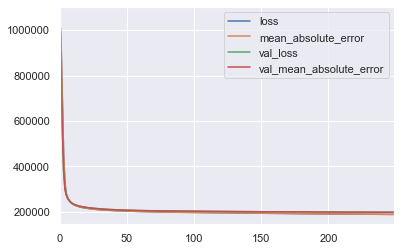

In [144]:
model_loss.plot()

In [145]:
model = Sequential()

model.add(Dense(units=110,activation='relu'))

model.add(Dense(units=55,activation='relu'))

model.add(Dense(units=1,activation='linear'))

# For a regression problem
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [146]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [147]:
model.fit(x=X_train, y=Y_train, epochs=250, validation_data=(X_test, Y_test), verbose=1, callbacks=[early_stop] )

Train on 19772 samples, validate on 4943 samples
Epoch 1/250
19772/19772 [==============================] - 3s 169us/sample - loss: 1057561.0435 - mean_absolute_error: 1057560.2500 - val_loss: 1045643.8976 - val_mean_absolute_error: 1045643.5000
Epoch 2/250
19772/19772 [==============================] - 2s 116us/sample - loss: 954414.2795 - mean_absolute_error: 954414.0000 - val_loss: 842168.5659 - val_mean_absolute_error: 842168.4375
Epoch 3/250
19772/19772 [==============================] - 2s 113us/sample - loss: 657255.4480 - mean_absolute_error: 657255.8750 - val_loss: 505624.2033 - val_mean_absolute_error: 505624.2812
Epoch 4/250
19772/19772 [==============================] - 3s 149us/sample - loss: 396039.7864 - mean_absolute_error: 396039.7188 - val_loss: 336622.4335 - val_mean_absolute_error: 336622.4375
Epoch 5/250
19772/19772 [==============================] - 3s 157us/sample - loss: 302232.2078 - mean_absolute_error: 302232.2500 - val_loss: 289545.4203 - val_mean_absolute_e

19772/19772 [==============================] - 2s 120us/sample - loss: 205732.6631 - mean_absolute_error: 205732.6250 - val_loss: 209555.7870 - val_mean_absolute_error: 209555.7969
Epoch 44/250
19772/19772 [==============================] - 3s 129us/sample - loss: 205474.8370 - mean_absolute_error: 205474.8750 - val_loss: 209311.1454 - val_mean_absolute_error: 209311.0938
Epoch 45/250
19772/19772 [==============================] - 2s 120us/sample - loss: 205231.9206 - mean_absolute_error: 205231.8750 - val_loss: 209091.0022 - val_mean_absolute_error: 209090.9531
Epoch 46/250
19772/19772 [==============================] - 3s 130us/sample - loss: 204996.4006 - mean_absolute_error: 204996.2969 - val_loss: 208841.2344 - val_mean_absolute_error: 208841.2344
Epoch 47/250
19772/19772 [==============================] - 3s 131us/sample - loss: 204734.8497 - mean_absolute_error: 204734.8906 - val_loss: 208589.0526 - val_mean_absolute_error: 208589.0625
Epoch 48/250
19772/19772 [=================

19772/19772 [==============================] - 2s 111us/sample - loss: 195260.0451 - mean_absolute_error: 195259.9531 - val_loss: 201675.9451 - val_mean_absolute_error: 201675.9062
Epoch 128/250
19772/19772 [==============================] - 3s 129us/sample - loss: 195206.3283 - mean_absolute_error: 195206.4375 - val_loss: 201704.1603 - val_mean_absolute_error: 201704.2031
Epoch 129/250
19772/19772 [==============================] - 2s 114us/sample - loss: 195133.0543 - mean_absolute_error: 195133.0312 - val_loss: 201593.8542 - val_mean_absolute_error: 201593.8281
Epoch 130/250
19772/19772 [==============================] - 2s 117us/sample - loss: 195066.3171 - mean_absolute_error: 195066.2500 - val_loss: 201704.0657 - val_mean_absolute_error: 201704.0156
Epoch 131/250
19772/19772 [==============================] - 2s 123us/sample - loss: 194987.7746 - mean_absolute_error: 194987.7188 - val_loss: 201621.2078 - val_mean_absolute_error: 201621.1875
Epoch 132/250
19772/19772 [============

19772/19772 [==============================] - 2s 102us/sample - loss: 190742.7110 - mean_absolute_error: 190742.6719 - val_loss: 199164.6432 - val_mean_absolute_error: 199164.6406
Epoch 212/250
19772/19772 [==============================] - 2s 108us/sample - loss: 190695.8562 - mean_absolute_error: 190695.8594 - val_loss: 199479.4570 - val_mean_absolute_error: 199479.4375
Epoch 213/250
19772/19772 [==============================] - 2s 107us/sample - loss: 190696.6275 - mean_absolute_error: 190696.6875 - val_loss: 199246.7599 - val_mean_absolute_error: 199246.7812
Epoch 214/250
19772/19772 [==============================] - 2s 104us/sample - loss: 190611.3569 - mean_absolute_error: 190611.3281 - val_loss: 199245.8057 - val_mean_absolute_error: 199245.7969
Epoch 215/250
19772/19772 [==============================] - 2s 105us/sample - loss: 190578.7394 - mean_absolute_error: 190578.8125 - val_loss: 199263.2660 - val_mean_absolute_error: 199263.3125
Epoch 216/250
19772/19772 [============

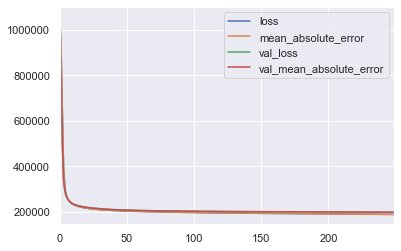

In [148]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [149]:
model = Sequential()
model.add(Dense(units = 110, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 55, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='linear'))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [150]:
model.fit(x=X_train, y=Y_train,  epochs=500, validation_data=(X_test, Y_test), verbose=1, callbacks=[early_stop])

Train on 19772 samples, validate on 4943 samples
Epoch 1/500
19772/19772 [==============================] - 4s 193us/sample - loss: 1060581.1620 - mean_absolute_error: 1060581.5000 - val_loss: 1058097.6059 - val_mean_absolute_error: 1058097.5000
Epoch 2/500
19772/19772 [==============================] - 3s 132us/sample - loss: 999551.9283 - mean_absolute_error: 999552.1250 - val_loss: 935445.9686 - val_mean_absolute_error: 935445.8750
Epoch 3/500
19772/19772 [==============================] - 3s 134us/sample - loss: 802192.9844 - mean_absolute_error: 802193.5000 - val_loss: 669242.4536 - val_mean_absolute_error: 669242.5000
Epoch 4/500
19772/19772 [==============================] - 2s 125us/sample - loss: 554188.7586 - mean_absolute_error: 554188.8750 - val_loss: 444222.9538 - val_mean_absolute_error: 444222.8125
Epoch 5/500
19772/19772 [==============================] - 3s 129us/sample - loss: 409749.0052 - mean_absolute_error: 409748.9062 - val_loss: 333761.6641 - val_mean_absolute_e

19772/19772 [==============================] - 3s 176us/sample - loss: 279100.0719 - mean_absolute_error: 279100.0625 - val_loss: 218951.0510 - val_mean_absolute_error: 218951.0781
Epoch 44/500
19772/19772 [==============================] - 3s 131us/sample - loss: 278028.7265 - mean_absolute_error: 278028.6250 - val_loss: 218584.6494 - val_mean_absolute_error: 218584.6406
Epoch 45/500
19772/19772 [==============================] - 3s 138us/sample - loss: 276957.3098 - mean_absolute_error: 276957.3750 - val_loss: 218219.7271 - val_mean_absolute_error: 218219.7969
Epoch 46/500
19772/19772 [==============================] - 2s 122us/sample - loss: 277115.6166 - mean_absolute_error: 277115.6562 - val_loss: 217645.6868 - val_mean_absolute_error: 217645.6562
Epoch 47/500
19772/19772 [==============================] - 2s 123us/sample - loss: 277393.8255 - mean_absolute_error: 277393.7500 - val_loss: 217479.9984 - val_mean_absolute_error: 217479.9688
Epoch 48/500
19772/19772 [=================

19772/19772 [==============================] - 2s 126us/sample - loss: 264164.1662 - mean_absolute_error: 264164.1875 - val_loss: 206702.8176 - val_mean_absolute_error: 206702.7969
Epoch 128/500
19772/19772 [==============================] - 2s 125us/sample - loss: 262694.2929 - mean_absolute_error: 262694.3125 - val_loss: 206452.4104 - val_mean_absolute_error: 206452.4531
Epoch 129/500
19772/19772 [==============================] - 2s 125us/sample - loss: 263577.5911 - mean_absolute_error: 263577.6250 - val_loss: 206600.7291 - val_mean_absolute_error: 206600.6719
Epoch 130/500
19772/19772 [==============================] - 2s 124us/sample - loss: 262761.0576 - mean_absolute_error: 262760.9688 - val_loss: 207296.8623 - val_mean_absolute_error: 207296.8594
Epoch 131/500
19772/19772 [==============================] - 3s 169us/sample - loss: 262398.0719 - mean_absolute_error: 262398.0312 - val_loss: 206851.9314 - val_mean_absolute_error: 206851.9062
Epoch 132/500
19772/19772 [============

19772/19772 [==============================] - 2s 125us/sample - loss: 260380.5704 - mean_absolute_error: 260380.3750 - val_loss: 203787.7209 - val_mean_absolute_error: 203787.7656
Epoch 212/500
19772/19772 [==============================] - 3s 138us/sample - loss: 261585.5294 - mean_absolute_error: 261585.5156 - val_loss: 203637.1591 - val_mean_absolute_error: 203637.1562
Epoch 213/500
19772/19772 [==============================] - 2s 125us/sample - loss: 260731.1131 - mean_absolute_error: 260731.3125 - val_loss: 203751.7854 - val_mean_absolute_error: 203751.7812
Epoch 214/500
19772/19772 [==============================] - 2s 124us/sample - loss: 260915.9362 - mean_absolute_error: 260915.9531 - val_loss: 203624.1137 - val_mean_absolute_error: 203624.1562
Epoch 215/500
19772/19772 [==============================] - 2s 123us/sample - loss: 259004.0360 - mean_absolute_error: 259003.9688 - val_loss: 203800.1866 - val_mean_absolute_error: 203800.1719
Epoch 216/500
19772/19772 [============

19772/19772 [==============================] - 2s 125us/sample - loss: 255169.6342 - mean_absolute_error: 255169.5625 - val_loss: 201234.7194 - val_mean_absolute_error: 201234.7656
Epoch 296/500
19772/19772 [==============================] - 2s 124us/sample - loss: 254586.8023 - mean_absolute_error: 254586.7188 - val_loss: 201414.6983 - val_mean_absolute_error: 201414.7188
Epoch 297/500
19772/19772 [==============================] - 3s 127us/sample - loss: 255652.3327 - mean_absolute_error: 255652.3594 - val_loss: 201293.6762 - val_mean_absolute_error: 201293.6719
Epoch 298/500
19772/19772 [==============================] - 3s 131us/sample - loss: 257068.8888 - mean_absolute_error: 257069.1094 - val_loss: 201794.9781 - val_mean_absolute_error: 201794.9375
Epoch 299/500
19772/19772 [==============================] - 2s 124us/sample - loss: 256308.8204 - mean_absolute_error: 256308.7969 - val_loss: 202041.1699 - val_mean_absolute_error: 202041.1562
Epoch 300/500
19772/19772 [============

19772/19772 [==============================] - 2s 87us/sample - loss: 254047.8636 - mean_absolute_error: 254047.9688 - val_loss: 200472.6394 - val_mean_absolute_error: 200472.6562
Epoch 380/500
19772/19772 [==============================] - 2s 82us/sample - loss: 253535.4053 - mean_absolute_error: 253535.5781 - val_loss: 201076.2257 - val_mean_absolute_error: 201076.2500
Epoch 381/500
19772/19772 [==============================] - 2s 92us/sample - loss: 257412.9904 - mean_absolute_error: 257412.9688 - val_loss: 200567.2985 - val_mean_absolute_error: 200567.3438
Epoch 382/500
19772/19772 [==============================] - 3s 161us/sample - loss: 254604.4796 - mean_absolute_error: 254604.5000 - val_loss: 200406.7583 - val_mean_absolute_error: 200406.6875
Epoch 383/500
19772/19772 [==============================] - 2s 103us/sample - loss: 256232.5818 - mean_absolute_error: 256232.7188 - val_loss: 201124.5384 - val_mean_absolute_error: 201124.5469
Epoch 384/500
19772/19772 [===============

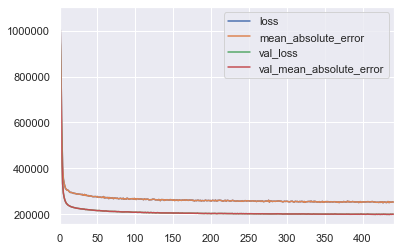

In [151]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()